In [1]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
import pickle
%matplotlib inline 

[nltk_data] Downloading package stopwords to C:\Users\HERU
[nltk_data]     OZ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
dataset = pd.read_csv('UAS-IR.csv', encoding='UTF-8')
dataset.head()

,Title,Author,Text,Categories,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Billy Beane’s revolutionary use of Statistical...,Sunil Sharma,Sabermetrics is a specific type of data analys...,sport,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kyle Lowry Is The Paragon Of Toughness,Ryan Fan,The words came after Game 7 of the first round...,sport,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,How I’m learning to program: it’s an endurance...,Amy M Haddad,I’ve read stories about people trying to learn...,sport,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,How a Sport Dies,Howard Chai,Imagine a sport where head-to-head collisions ...,sport,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,How Do You Stay In The World’s Most Dangerous ...,Alastair Macartney,Earlier this year my wife became pregnant with...,sport,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
dataset.drop(dataset.columns[dataset.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
dataset.drop(['Title','Author'], axis = 1, inplace = True)

In [4]:
dataset.head()

,Text,Categories
0,Sabermetrics is a specific type of data analys...,sport
1,The words came after Game 7 of the first round...,sport
2,I’ve read stories about people trying to learn...,sport
3,Imagine a sport where head-to-head collisions ...,sport
4,Earlier this year my wife became pregnant with...,sport


In [5]:
dataset['Categories'].value_counts()

sport          20
music          20
Games          19
Android Dev    18
Name: Categories, dtype: int64

In [6]:
dataset['Categories'] = dataset['Categories'].map({'music': 0, 'sport': 1, 'Games': 2, 'Android Dev': 3})
dataset.head()

,Text,Categories
0,Sabermetrics is a specific type of data analys...,1
1,The words came after Game 7 of the first round...,1
2,I’ve read stories about people trying to learn...,1
3,Imagine a sport where head-to-head collisions ...,1
4,Earlier this year my wife became pregnant with...,1


In [7]:
dataset['Categories'].value_counts()

1    20
0    20
2    19
3    18
Name: Categories, dtype: int64

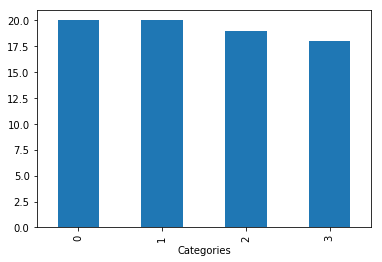

In [10]:
dataset.groupby('Categories').Text.count().plot.bar(ylim=0)
plt.show()

In [9]:
stemmer = PorterStemmer()
words = stopwords.words("english")

dataset['cleaned'] = dataset['Text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [11]:
dataset.head()

,Text,Categories,cleaned
0,Sabermetrics is a specific type of data analys...,1,sabermetr specif type data analysi use statist...
1,The words came after Game 7 of the first round...,1,the word came game first round nba playoff tor...
2,I’ve read stories about people trying to learn...,1,i read stori peopl tri learn program breakneck...
3,Imagine a sport where head-to-head collisions ...,1,imagin sport head head collis occur time game ...
4,Earlier this year my wife became pregnant with...,1,earlier year wife becam pregnant first child t...
